In [32]:
import numpy as np
import pandas as pd
import xlrd
import os
import tarfile
from six.moves import urllib
import seaborn as sns


In [33]:
%matplotlib inline

In [34]:
pre = os.path.dirname(os.path.realpath('__file__'))
fname = 'DataFile1.xlsx'
path = os.path.join(pre, fname)
data = pd.read_excel(path)

In [35]:
data.head()

,Range,HITF/RHTL #,Shot #,Shot Date,Program,Series,Series Test #,Desired Velocity,Actual Velocity,Delta Velocity,...,Barrel,Petal Valve,Accept / Unaccept,Reason If Unaccept,ES,Sabot Material,Sabot OD,Sabot Depth,Count,Muzzle
0,.50 Cal,17491,1865,2017-12-08,ISS,SNC Dream Chaser TPS HVI Test Program: PNP BL ...,3,7.0,6.98,-0.02,...,15,10k 304l ss,Acceptable,NaN,NaN,4 Piece lexan rear serrations,0.5000,6,1,0.4965
1,.50 Cal,RHTL 18URO 076,1863,2017-12-07,URO,Europa Clipper Propulsion Module,5.4.1.3-3,7.0,6.97,-0.03,...,15,10k 304l ss,Acceptable,NaN,NaN,4 Piece lexan rear serrations,0.5000,5.5,1,0.4965
2,.50 Cal,17275,1863,2017-12-06,CCP,SpaceX Dragon-2 HVI Test Program: PNP BL Asses...,11,7.0,6.93,-0.07,...,15,10k 304l ss,Acceptable,NaN,NaN,4 piece lexan rear serrations,0.5000,5.5,1,0.4965
3,.50 Cal,RHTL 18URO 075,1861,2017-12-05,URO,RHTL 18URO 075,5.2.1.4-2,7.0,6.90,-0.10,...,15,10k 304l ss,Unacceptable,Impacted Stripper,NaN,4 Piece lexan rear serrations,NaN,6,1,0.4965
4,.50 Cal,17493,1860,2017-12-04,ISS,SNC Dream Chaser TPS HVI Test Program: PNP BL ...,5,7.0,7.01,0.01,...,15,10k 304l ss,Acceptable,NaN,NaN,4 Piece lexan rear serrations,0.4995,6,1,0.4965


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 25 columns):
Range                  341 non-null object
HITF/RHTL #            341 non-null object
Shot #                 341 non-null object
Shot Date              341 non-null datetime64[ns]
Program                340 non-null object
Series                 179 non-null object
Series Test #          178 non-null object
Desired Velocity       341 non-null float64
Actual Velocity        341 non-null float64
Delta Velocity         341 non-null float64
Powder                 341 non-null float64
Lp Mass                341 non-null float64
Projectile             341 non-null float64
Projectile Material    341 non-null object
Projectile Mass        130 non-null float64
Barrel                 341 non-null int64
Petal Valve            331 non-null object
Accept / Unaccept      337 non-null object
Reason If Unaccept     33 non-null object
ES                     41 non-null float64
Sabot Material        

In [37]:
data.drop('Count', axis=1, inplace=True)

In [38]:
data.describe()

,Desired Velocity,Actual Velocity,Delta Velocity,Powder,Lp Mass,Projectile,Projectile Mass,Barrel,ES,Sabot OD,Muzzle
count,341.000000,341.00000,341.000000,341.000000,341.000000,341.000000,130.000000,341.000000,41.0,336.000000,340.000000
mean,6.736657,6.72129,-0.015367,174.789267,1.841756,4.419629,0.256486,11.392962,2.0,0.691093,0.523888
std,0.690634,0.75820,0.241546,31.509249,0.629813,2.095232,0.366346,3.320765,0.0,0.869073,0.026037
min,4.000000,3.52000,-2.230000,77.000000,1.004040,1.180000,0.010730,3.000000,2.0,0.000000,0.487000
25%,7.000000,6.85000,-0.060000,162.050000,1.253000,2.770000,0.042612,9.000000,2.0,0.503000,0.502000
50%,7.000000,7.01000,0.030000,175.700000,1.834100,4.100000,0.094735,11.000000,2.0,0.525500,0.520200
75%,7.000000,7.08000,0.100000,199.000000,2.265420,5.470000,0.285435,14.000000,2.0,0.551000,0.541800
max,7.000000,7.30000,0.510000,227.000000,3.891260,11.150000,1.614860,18.000000,2.0,5.725000,0.590700


In [39]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# data.hist(bins=50, figsize=(20,15))
# plt.show()

In [40]:
corr_matrix = data.corr()

corr_matrix["Actual Velocity"].sort_values(ascending=False)

Actual Velocity     1.000000
Desired Velocity    0.948649
Powder              0.735101
Delta Velocity      0.426548
Muzzle              0.167520
Lp Mass             0.098674
Sabot OD            0.055392
Projectile          0.040026
Barrel             -0.025796
Projectile Mass    -0.084815
ES                       NaN
Name: Actual Velocity, dtype: float64

In [41]:



s = data["Sabot Depth"].convert_objects(convert_numeric=True).dropna()
data['sabot_od'] = pd.to_numeric(data['Sabot OD'], errors='coerce')

#pd.to_numeric(data["Sabot Depth"])


C:\Users\drodri18\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


In [42]:
data["Sabot Depth"] = s
data.dropna(subset=["Sabot Depth"],inplace=True)
data.dropna(subset=["sabot_od"],inplace=True)
# special = df[df.kind=='special']
# others = df[df.kind!='special']

# special = special.dropna(how='any')



In [43]:
data["Sabot_OD"] = data[(data['sabot_od']>0.4) & (data['sabot_od']<0.6)]['sabot_od']
data["Actual_Velocity"] = data[(data['Actual Velocity']>3.8) & (data['Actual Velocity']< 4.2)]['Actual Velocity']
data["Delta_Velocity"] = data[(data['Delta Velocity']> -0.17) & (data['Delta Velocity']< 0.17)]['Delta Velocity']
#data["Desired_Velocity"] = data[(data['Desired Velocity']> 6.79) & (data['Desired Velocity']< 7.1)]['Desired Velocity']
data["Desired_Velocity"] = data[data['Desired Velocity']== 4.0]['Desired Velocity']
data["Lp_Mass"] = data[data['Lp Mass']> 0.5]['Lp Mass']
data["Barrel_"] = data[(data['Barrel']!= 4) & (data['Barrel']!= 8) & (data['Barrel']!= 9) & (data['Barrel']!= 10)]['Barrel']
data.drop('Actual Velocity', axis=1,inplace=True)
data.drop('Delta Velocity', axis=1,inplace=True)
data.drop('Desired Velocity', axis=1,inplace=True)
data.drop('Lp Mass', axis=1,inplace=True)
data.drop('Sabot OD', axis=1,inplace=True)
data.drop('sabot_od', axis=1,inplace=True)
data.drop('Range', axis=1,inplace=True)
data.drop('Projectile', axis=1,inplace=True)
data.drop('Projectile Material', axis=1,inplace=True)
data.drop('Accept / Unaccept', axis=1,inplace=True)
data.drop('Reason If Unaccept ', axis=1,inplace=True)
data.drop('Shot Date', axis=1,inplace=True)
#data.drop('Barrel', axis=1,inplace=True)
data.drop('ES', axis=1,inplace=True)
data.drop('HITF/RHTL #', axis=1,inplace=True)
data.drop('Projectile Mass', axis=1,inplace=True)
data.drop('Shot #', axis=1,inplace=True)
data.drop('Program', axis=1,inplace=True)
data.drop('Series', axis=1,inplace=True)
data.drop('Series Test #', axis=1,inplace=True)
data.drop('Petal Valve', axis=1,inplace=True)
data.drop('Sabot Material', axis=1,inplace=True)
data.drop('Barrel', axis=1,inplace=True)
data.dropna(subset=["Muzzle"],inplace=True)
data.dropna(subset=["Sabot_OD"],inplace=True)
data.dropna(subset=["Actual_Velocity"],inplace=True)
data.dropna(subset=["Delta_Velocity"],inplace=True)
data.dropna(subset=["Desired_Velocity"],inplace=True)
data.dropna(subset=["Lp_Mass"],inplace=True)
data.dropna(subset=["Barrel_"],inplace=True)
data["Squeeze"] = data["Sabot_OD"] - data["Muzzle"]
data




,Powder,Sabot Depth,Muzzle,Sabot_OD,Actual_Velocity,Delta_Velocity,Desired_Velocity,Lp_Mass,Barrel_,Squeeze
54,80.5,5.25,0.4887,0.493,3.88,-0.12,4.0,1.21295,18.0,4.300000e-03
62,77.0,4.25,0.4887,0.492,3.93,-0.07,4.0,1.19956,18.0,3.300000e-03
254,83.6,7.00,0.4886,0.492,3.94,-0.06,4.0,1.86190,14.0,3.400000e-03
258,83.5,5.00,0.4886,0.489,4.09,0.09,4.0,1.80817,14.0,4.000000e-04
264,88.0,5.00,0.4870,0.487,4.14,0.14,4.0,1.80136,13.0,5.551115e-17


In [44]:
#data.dropna(subset=["Powder-(SabotOD-Muzzle*Insertion Depth)"],inplace=True)

#sabot_od = data[(data['Sabot OD']> 0.4) & (data['Sabot OD']<0.6)]

# sabot_od1 = data[data['Sabot_od']> 0.4]
# sabot_od1
# data['Sabot OD_'] = sabot_od1
#data[['Powder','Powder-(SabotOD-Muzzle*Insertion Depth)']]

In [45]:
corr_matrix = data.corr()

corr_matrix["Actual_Velocity"].sort_values(ascending=False)

Delta_Velocity      1.000000
Actual_Velocity     1.000000
Powder              0.773186
Lp_Mass             0.690295
Sabot Depth        -0.199233
Muzzle             -0.747732
Barrel_            -0.805454
Sabot_OD           -0.990854
Squeeze            -0.995141
Desired_Velocity         NaN
Name: Actual_Velocity, dtype: float64

In [46]:
corr_matrix = data.corr()

corr_matrix["Powder"].sort_values(ascending=False)

Powder              1.000000
Lp_Mass             0.827316
Delta_Velocity      0.773186
Actual_Velocity     0.773186
Sabot Depth         0.347245
Squeeze            -0.719392
Muzzle             -0.788162
Sabot_OD           -0.789259
Barrel_            -0.905951
Desired_Velocity         NaN
Name: Powder, dtype: float64

C:\Users\drodri18\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F6BC05BD30>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001F6BC6D4278>]], dtype=object)

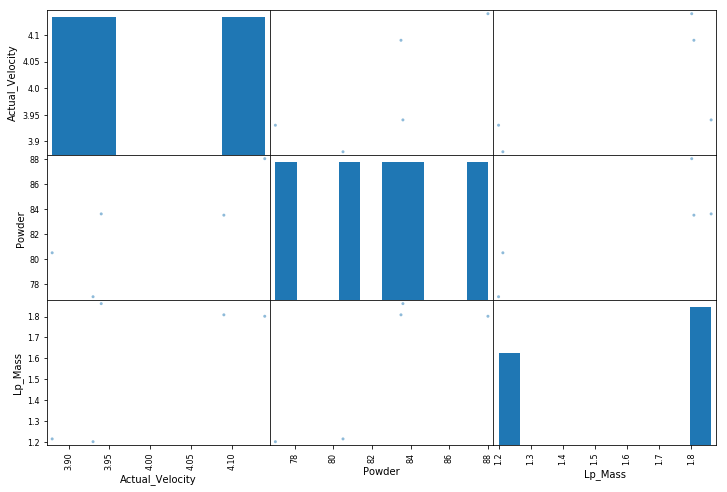

In [47]:
from pandas.tools.plotting import scatter_matrix

attributes = ["Actual_Velocity","Powder","Lp_Mass"]

scatter_matrix(data[attributes], figsize=(12,8))

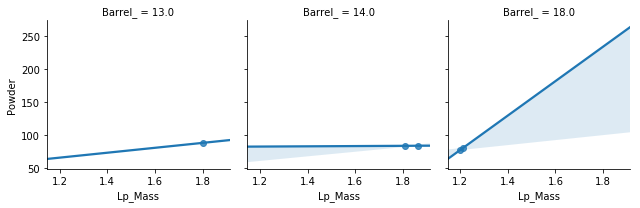

In [48]:
sns.lmplot(x='Lp_Mass', y='Powder',data=data, col='Barrel_', size=3)

In [49]:
writer = pd.ExcelWriter('CleanData.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
data.to_excel(writer, sheet_name='Sheet1')

# Close the Pandas Excel writer and output the Excel file.
writer.save()


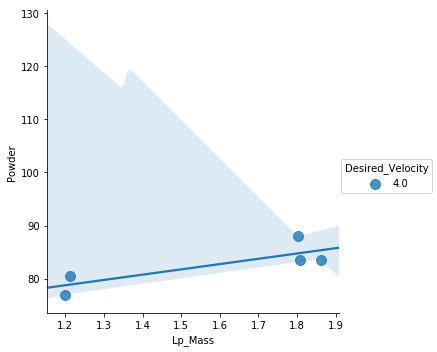

In [50]:
sns.lmplot(x='Lp_Mass', y='Powder', data=data,hue='Desired_Velocity',scatter_kws={'s':100})